In [6]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import dccp
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
    #  "contour.negative_linestyle": 'solid',
})


In [7]:
# Problem data
n = 50
l = 10
m = 5
a = np.array([0, 0])
b = np.array([l, l])
d = 2
p = np.array([[2, 4.5, 6, 7, 8.5], [2.2, 5, 8, 6, 9]])
r = [1, 0.8, 0.4, 1.4, 0.5]

In [8]:
# Formulate and solve
x = []
for i in range(n + 1):
    x += [cp.Variable((d))]
L = cp.Variable()
constraints = [x[0] == a, x[n] == b]

cost = L
for i in range(n):
    constraints += [cp.norm(x[i] - x[i + 1]) <= L / n]
    for j in range(m):
        constraints += [cp.norm(x[i] - p[:, j]) >= r[j]]
prob = cp.Problem(cp.Minimize(cost), constraints)
result = prob.solve(method="dccp")

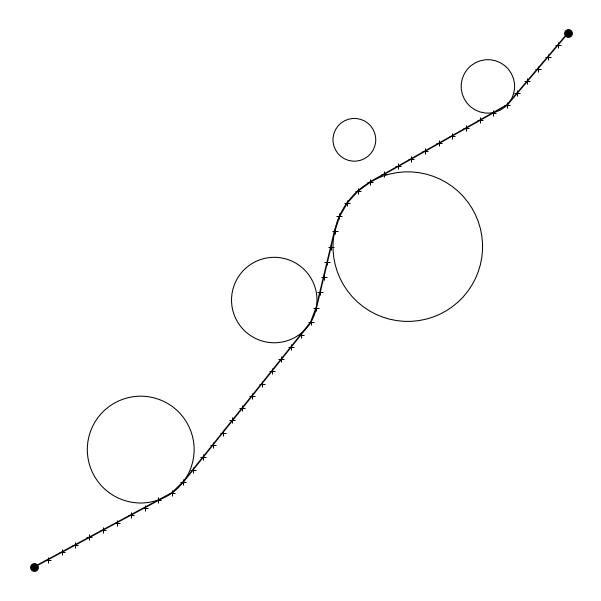

In [5]:
# plot
fig, ax = plt.subplots(figsize=(9, 9))
for i in range(m):
    circle = mpatches.Circle(np.array(p[:, i]), r[i], fill=False, ec="k")
    ax.add_patch(circle)
ax1 = [xx.value[0] for xx in x]
ax2 = [xx.value[1] for xx in x]
plt.plot(ax1, ax2, "k-+")
plt.scatter([a[0, 0]], [a[1, 0]], marker="o", color="k", s=60)
plt.scatter([b[0, 0]], [b[1, 0]], marker="o", color="k", s=60)
plt.ylim(-0.5, 10.5)
plt.xlim(-0.5, 10.5)
plt.axis('off')
plt.tight_layout()
plt.savefig("path_obstacle.pdf")